In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_excel('addidas sales data project.xlsx',header = 4)
df

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,NaN,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,NaN,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,NaN,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,NaN,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


#### The Cleaning Process

In [10]:
df.drop(['Unnamed: 0'], axis = 1,inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [12]:
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [17]:
df.Retailer.value_counts()

Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64

In [18]:
data = df.copy()
data

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


#### Exploratory Data Analysis

In [46]:
#Total Sales By Region
total_sales_by_region = data.groupby('Region')[['Total Sales']].sum().reset_index()
#print(type(total_sales_by_region))
total_sales_by_region

<class 'pandas.core.frame.DataFrame'>


,Region,Total Sales
0,Midwest,135800459.0
1,Northeast,186324067.0
2,South,144663181.0
3,Southeast,163171236.0
4,West,269943182.0


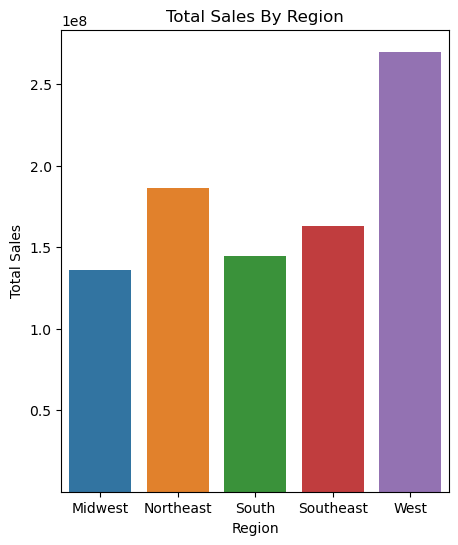

In [58]:
plt.figure(figsize = (5,6))
sns.barplot(data = total_sales_by_region,x = 'Region',y = 'Total Sales')
plt.title('Total Sales By Region')
plt.xlabel('Region')
#plt.yticks([50000000,100000000,150000000,200000000,250000000])
plt.ylabel('Total Sales')
plt.show()

In [59]:
# Total Sales by Retailers
total_sales_by_retailers = data.groupby('Retailer')[['Total Sales']].sum().reset_index()
total_sales_by_retailers

,Retailer,Total Sales
0,Amazon,77698912.0
1,Foot Locker,220094720.0
2,Kohl's,102114753.0
3,Sports Direct,182470997.0
4,Walmart,74558410.0
5,West Gear,242964333.0


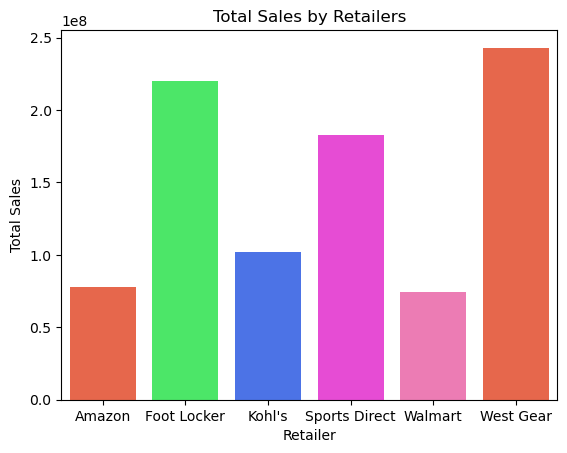

In [72]:
custom_palette = ["#FF5733", "#33FF57", "#3366FF", "#FF33E8", "#FF69B4"]


# Create barplot with custom color palette
sns.barplot(data=total_sales_by_retailers, x='Retailer', y='Total Sales', palette=custom_palette)

# Add labels and title
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.title('Total Sales by Retailers')

# Show plot
plt.show()

In [70]:
# Total Sales by Sales Method
total_sales_by_sales_Method = data.groupby('Sales Method')[['Total Sales']].sum().reset_index()
total_sales_by_sales_Method

,Sales Method,Total Sales
0,In-store,356643750.0
1,Online,247672882.0
2,Outlet,295585493.0


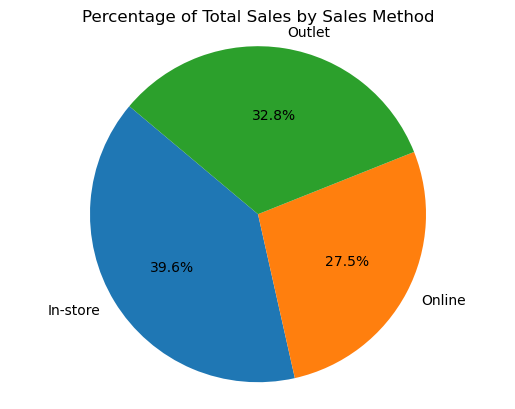

In [79]:
plt.pie(total_sales_by_sales_Method['Total Sales'].values,labels= total_sales_by_sales_Method['Sales Method'],autopct='%1.1f%%', startangle=140 )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Total Sales by Sales Method')

# Show plot
plt.show()

In [84]:
#Average Sales by Region
Avg_Sales_by_Region = data.groupby('Region')[['Total Sales','Units Sold']].mean().reset_index()
Avg_Sales_by_Region

,Region,Total Sales,Units Sold
0,Midwest,72542.980235,209.047543
1,Northeast,78419.220118,210.976010
2,South,83717.118634,284.872685
3,Southeast,133309.833333,332.516340
4,West,110270.907680,280.631127


In [87]:
#Total Units Sold by Products
Total_Units_Sold_by_product = data.groupby('Product')[['Units Sold']].sum().reset_index()
Total_Units_Sold_by_product

,Product,Units Sold
0,Men's Apparel,306683
1,Men's Athletic Footwear,435526
2,Men's Street Footwear,593320
3,Women's Apparel,433827
4,Women's Athletic Footwear,317236
5,Women's Street Footwear,392269


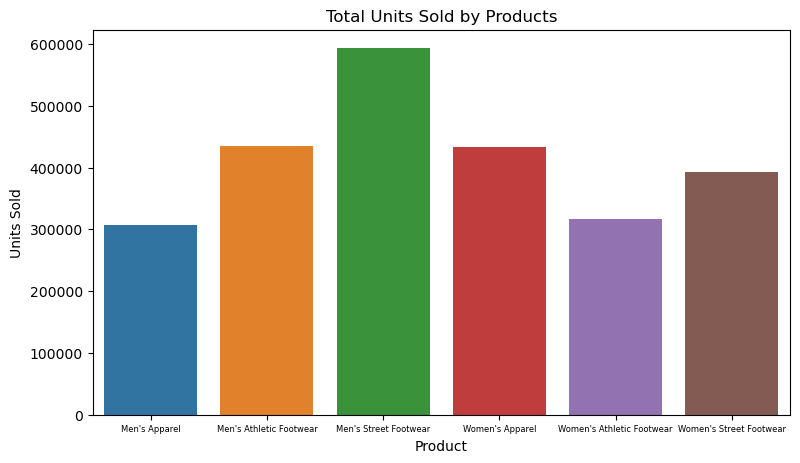

In [95]:
plt.figure(figsize = (9,5))
sns.barplot(data = Total_Units_Sold_by_product, x= 'Product' ,y = 'Units Sold')
plt.xticks(fontsize = 6)
plt.title('Total Units Sold by Products')
plt.show()